<a href="https://colab.research.google.com/github/AL-DN/AI_BasicTextClassificationADS/blob/main/FlowerImageClassificationADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
 # Author: Alden Sahi
# Date: 02/10/2024
# Project: FlowerImageClassificationADS
# Project Description: classifies 5 diffferent types of flowers.
#Reference: https://www.tensorflow.org/tutorials/images/classification

In [14]:
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# tar files do not provide compression themselves they comine files into one file
# it is usualy used in conjuction with a compression utilitily like gzp or bzip2.
# in this case it is gzp becasue of the extension .tgz
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
#removes suffix
data_dir = pathlib.Path(data_dir).with_suffix('')

In [16]:
# finds the len of the list of all files with
  # .glob function that specifies
  # * directory, * filename, ending in .jpg
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


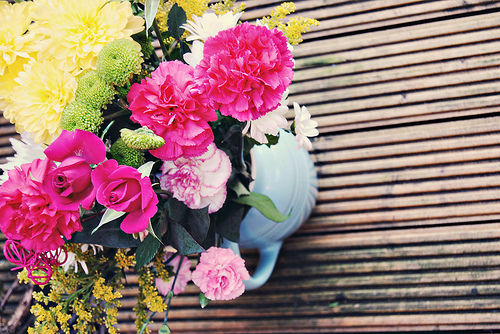

In [17]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(roses[0])

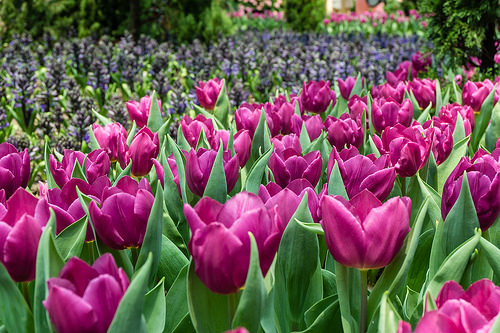

In [18]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [19]:
# Now that we have the files stored locally we must export them to
# our tf.data.Datsets used for training
#Step 1: define parameters of loader
batch_size = 32
img_height = 180
img_width = 180

In [20]:
# train ds

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
# val ds

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


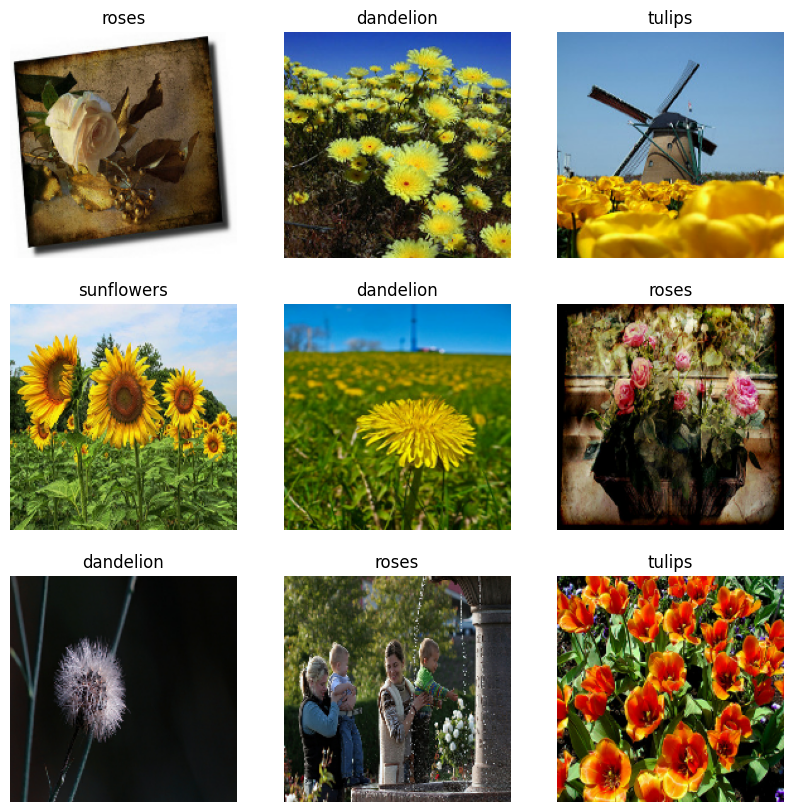

In [22]:
# display some data


# creates figure
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    # subplot(a,b,n)splits plot into an a by b grid with axes at n
    ax=plt.subplot(3,3,i+1)
     # although tensors are great for running quickly on gpus
     # .numpy allows you to convert the tensor into a numpy array
     # for a better variety of functions
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [23]:
class_names = train_ds.class_names

In [24]:
# prepare dataset
# Dataset.cache keeps data in memory after first epoch
# Dataset.prefetch lets the gpu start processing data while the cpu sends it

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [25]:
normalization_layer = layers.Rescaling(1./255)

In [26]:
# think of .map() as transform() it allows you to
# trasnform the elements in a ds
normalized_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch, label_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [27]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(num_classes)

  ])

In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 129600)            0